In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [3]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Step:1

In [ ]:
# Problem Statement

To Predict species based on various features.
This is Multiclass Classification

# Step:2

In [4]:
# Data Gathering

df.drop('Id',axis=1, inplace=True)

In [5]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Step:3

In [6]:
# EDA
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [7]:
from sklearn.datasets import load_iris

In [8]:
iris = load_iris()

In [9]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [10]:

iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Step:4

In [15]:
# Feature Engineering

df['Species'].dtype

dtype('O')

In [16]:
 species = {0:'Iris-setosa',1:'Iris-versicolor',2:'Iris-virginica'}

In [17]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [18]:
df.Species.value_counts().to_dict()

{'Iris-setosa': 50, 'Iris-versicolor': 50, 'Iris-virginica': 50}

In [19]:
df.Species.replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2},inplace=True)

In [20]:
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [21]:
df['Species'].value_counts()/len(df)*100

0    33.333333
1    33.333333
2    33.333333
Name: Species, dtype: float64

In [22]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [23]:
df.Species.dtype

dtype('int64')

<AxesSubplot:xlabel='Species', ylabel='count'>

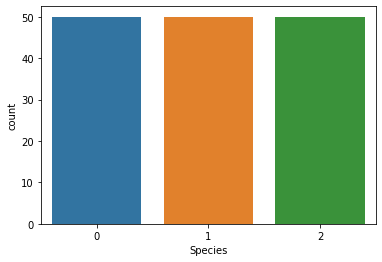

In [24]:
sns.countplot(x=df['Species'])

# Step:5

# Step:6

In [25]:
# Model Training

x = df.drop('Species',axis=1)
y = df['Species']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=19,stratify=y)

In [26]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [27]:
model = LogisticRegression(max_iter= 150)
model.fit(x_train,y_train)

LogisticRegression(max_iter=150)

# Step:7

In [ ]:
# Model Evaluation
# Testing Data
# Training Data

In [28]:
y_test.value_counts()

0    13
1    13
2    12
Name: Species, dtype: int64

In [29]:
def model_evl(model,x,y):
    y_pred = model.predict(x)
    
    acc_score = accuracy_score(y,y_pred)
    print(f"Accuracy Score =\n {acc_score}")
    
    con_mat = confusion_matrix(y,y_pred)
    print(f"Confision Matrix = \n {con_mat}")
    
    clf_report = classification_report(y,y_pred)
    print(f"Classification Report = \n {clf_report}")
    
    return "Performance Evaluation"     
    

In [30]:
model_evl(model,x_test,y_test)

Accuracy Score =
 0.9473684210526315
Confision Matrix = 
 [[13  0  0]
 [ 0 13  0]
 [ 0  2 10]]
Classification Report = 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.87      1.00      0.93        13
           2       1.00      0.83      0.91        12

    accuracy                           0.95        38
   macro avg       0.96      0.94      0.95        38
weighted avg       0.95      0.95      0.95        38



'Performance Evaluation'

In [31]:
model_evl(model,x_train,y_train)

Accuracy Score =
 0.9642857142857143
Confision Matrix = 
 [[37  0  0]
 [ 0 35  2]
 [ 0  2 36]]
Classification Report = 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.95      0.95      0.95        37
           2       0.95      0.95      0.95        38

    accuracy                           0.96       112
   macro avg       0.96      0.96      0.96       112
weighted avg       0.96      0.96      0.96       112



'Performance Evaluation'

In [ ]:
# Bias and varience

Bias >>low Bias
Variance >>low variance
Best Model

In [33]:
with open('iris.pkl','wb') as file:
    pickle.dump(model,file)

In [34]:
with open('species.json','w') as file:
    json.dump(species,file)